# Exploratory analysis & Outlier detection for Socio Economic Part



## 1. Importing modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [1]:
!pip install autopep8

## 2. Loading data

This dataset contains info obtained from Aquastat and UNICEF. We are going to analyze the following variables:

   * HDI
   * Population growth
   * Life expectancy
   * Mortality rate
   * GDP
   * The ratio of rural over urban population
   * The proportion of rural population with access to clean water
    

In [4]:
df = pd.read_csv('clean data/socioec_factors.csv', index_col=0)
df.sample(5)

,Country,rural_pop,urban_pop,HDI,r_u,r_u_access,pop_growth,mort_rate,GDP_pcp,life_ex
133,USA,58215.947,266243.516,0.919,0.218657,0.987928,0.68,6.0,58237.6,79.0
77,LTU,938.898,1951.399,0.866,0.481141,0.906720,-1.10,4.0,31032.8,74.6
80,MAR,13613.878,22125.702,0.675,0.615297,0.661601,1.36,22.0,7059.8,75.6
61,IRL,1764.335,2997.322,0.939,0.588637,0.998979,0.86,3.0,66637.4,81.4
59,IDN,119696.518,144294.861,0.704,0.829527,0.843949,1.26,23.2,10175.0,70.6


In [8]:
df_ws = pd.read_csv('clean data/water_stress.csv')
df_ws.sample(5)

,Country,WS_MDG,WUE_SDG,WS_SDG
129,PHL,19.363257,3.375686,28.355243
46,DOM,38.629362,7.506169,50.309798
21,BRA,0.759570,22.010528,3.105437
61,GIN,0.253982,14.230623,0.883077
89,KOR,41.889527,52.445010,85.221833


In [9]:
# merge aquastat with water stress.
# left merge to only keep aquastat countries
df_piv_ws = pd.merge(df, df_ws, on=["Country"], how='left')
df_piv_ws.sample(5)

,Country,rural_pop,urban_pop,HDI,r_u,r_u_access,pop_growth,mort_rate,GDP_pcp,life_ex,WS_MDG,WUE_SDG,WS_SDG
69,KGZ,3860.700,2184.417,0.671,1.767382,0.891417,2.00,20.0,4823.4,70.6,32.631891,0.836196,50.038956
52,GNQ,359.435,908.254,0.590,0.395743,0.434483,4.04,68.0,28361.4,57.4,0.076154,NaN,0.183503
7,AZE,4388.663,5438.926,0.752,0.806899,0.821542,1.16,23.6,14548.6,72.2,36.861139,3.665472,56.443365
129,TUR,20473.563,60271.457,0.805,0.339689,1.000000,1.66,11.4,25882.0,76.6,28.360113,13.603153,44.574018
58,HUN,2813.212,6908.347,0.841,0.407219,1.000000,-0.28,4.4,27417.0,76.0,4.325962,23.880203,7.770294


In [10]:
# final dataset

df1 = df_piv_ws[['Country', 'HDI', 'r_u', 'r_u_access',
                 'pop_growth', 'mort_rate', 'life_ex', 'GDP_pcp']]
df1.head()

,Country,HDI,r_u,r_u_access,pop_growth,mort_rate,life_ex,GDP_pcp
0,AFG,0.493,2.960340,0.601023,3.06,53.2,63.4,2226.0
1,AGO,0.576,0.542292,0.374005,3.44,58.6,59.2,7859.4
2,ALB,0.789,0.683985,1.003161,-0.20,8.6,78.0,12227.4
3,ARE,0.864,0.159447,1.004016,0.74,7.0,77.2,64243.0
4,ARG,0.832,0.089930,1.010101,1.08,10.2,76.0,23732.2


In [11]:
df_tmp = df1.copy()

## 3. Exploratory analysis

In this section we are going to inspect the behaviour of each variable and the relationship between them, below we present the univariate and bivariate descriptive statistics

### 3.1 Univariate exploratory analysis

#### 3.1.1  Checking the distribution per indicator

First, we standardize the variables to explore the relationship between them. 

In [14]:
# transform variables (std)
scaler = StandardScaler()
# get numeric data
num_d = df_tmp.drop(["Country"], axis=1)

In [16]:
# update the cols with their normalized values
df_tmp[num_d.columns] = scaler.fit_transform(num_d)

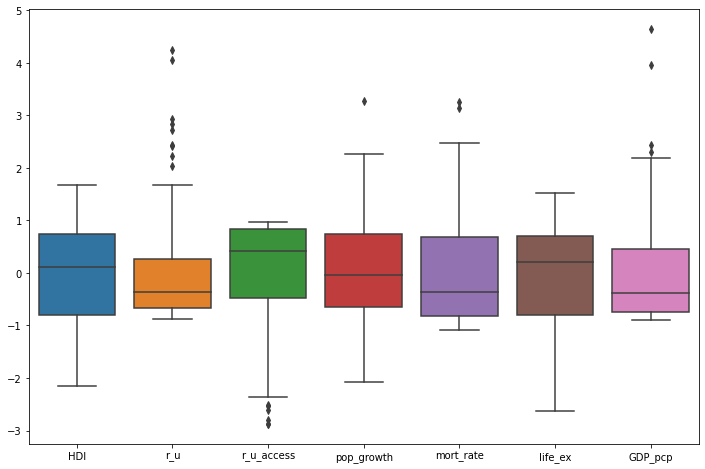

In [18]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(data=df_tmp)
plt.show()

- From the previous boxplots, we can see there are some outliers in the proportion of rural over urban population ( _r-u_ ), the proportion of the rural population with access to safe drinking water(_ru-access_) and _GDP_ . Also, few cases on pop_growth and mort_rate. We will explore this in more depth afterwards.

In [13]:
df_tmp.describe()

,HDI,r_u,r_u_access,pop_growth,mort_rate,life_ex,GDP_pcp
count,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000,138.000000
mean,0.700057,1.177456,0.859069,1.557801,24.612766,71.188571,18407.337681
std,0.152312,1.346868,0.169591,1.281321,20.820144,7.761768,19907.620317
min,0.373000,0.000000,0.372727,-3.600000,2.000000,50.800000,831.400000
25%,0.577000,0.260017,0.777436,0.740000,7.800000,65.450000,3886.000000
50%,0.717000,0.683985,0.930000,1.400000,17.400000,72.500000,11108.900000
75%,0.813000,1.539356,1.000000,2.500000,38.800000,76.300000,27180.850000
max,0.953000,6.870257,1.024084,5.740000,92.200000,83.000000,110631.000000


#### 3.1.2 Distribution of each indicator per country

In [17]:
print(df_tmp.isna().sum(axis=0))
df_tmp = df_tmp.dropna(axis=0)

Country       0
HDI           0
r_u           0
r_u_access    0
pop_growth    0
mort_rate     0
life_ex       1
GDP_pcp       3
dtype: int64


<AxesSubplot:ylabel='Country'>

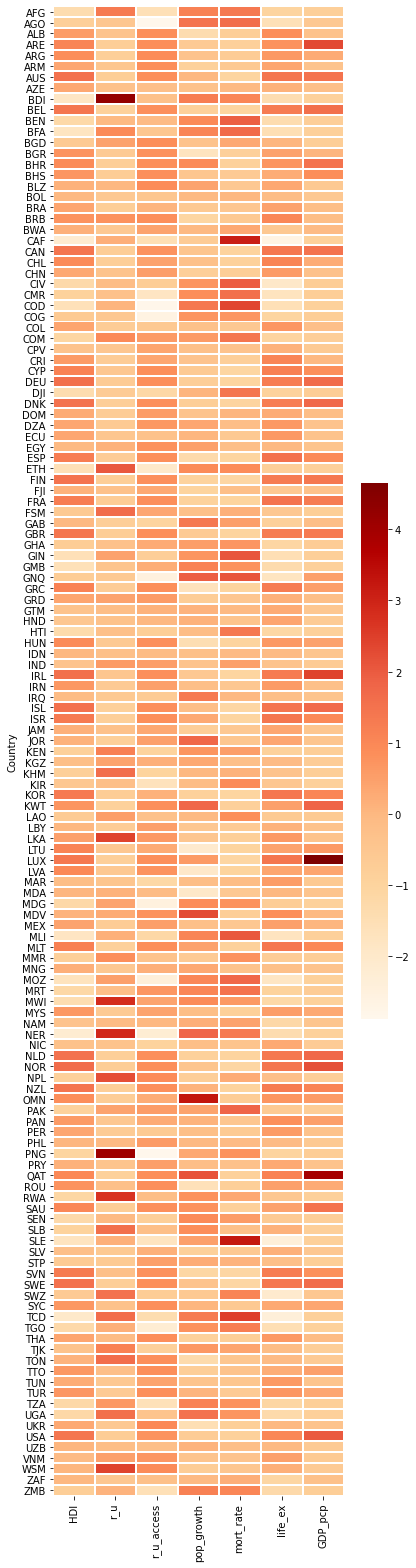

In [19]:
# setting index so heatmap can be plotted
df_tmp.set_index(['Country'], inplace=True)
plt.subplots(figsize=(6, .2*(len(df_tmp.index))))
sns.heatmap(df_tmp,
            cbar_kws={'fraction': 0.08},  # shrink colour bar
            cmap='OrRd',  # use orange/red colour map
            linewidth=1)

- From above we can see that the outliers from GDP are countries like QAT, LUX, ARE, IRL ...
- PNG & BDI have high ratio of rural pop (r_u)
- OMN QAT MDV have high pop growth 
- SLE, CAF, TCD have large mort_rate

### 3.2 Bivariate Analysis

#### 3.2.1 Checking the correlation between variables

<AxesSubplot:>

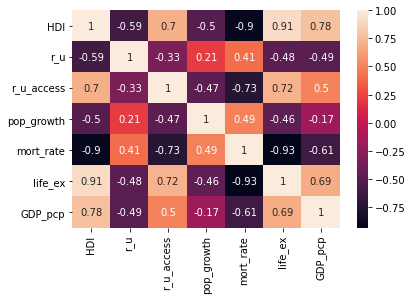

In [20]:
corr_data = df_tmp.corr()
sns.heatmap(corr_data, annot=True)

- The heatmap shows that the mortality rate is highly negatively correlated with HDI (-0.9) and life_ex (-0.93). HDI is highly correlated with the life expectancy.

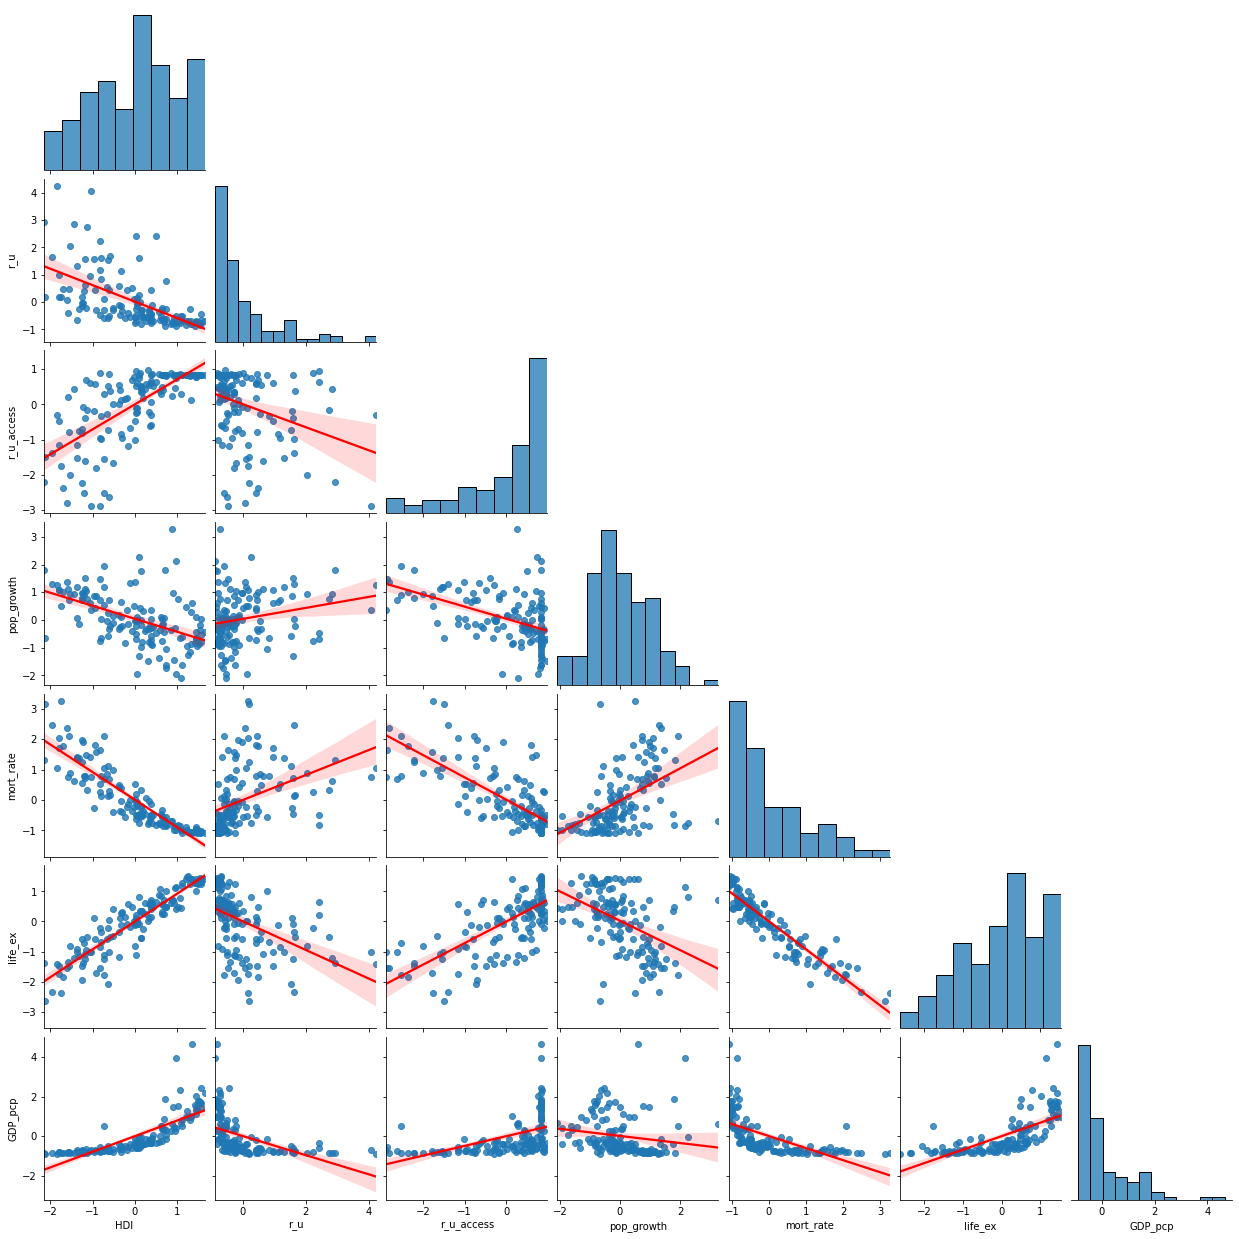

In [21]:
g = sns.pairplot(df_tmp, kind="reg", corner=True,
                 plot_kws={'line_kws': {'color': 'red'}})

#### 3.2.2 Hierarchical Clustered Heatmap

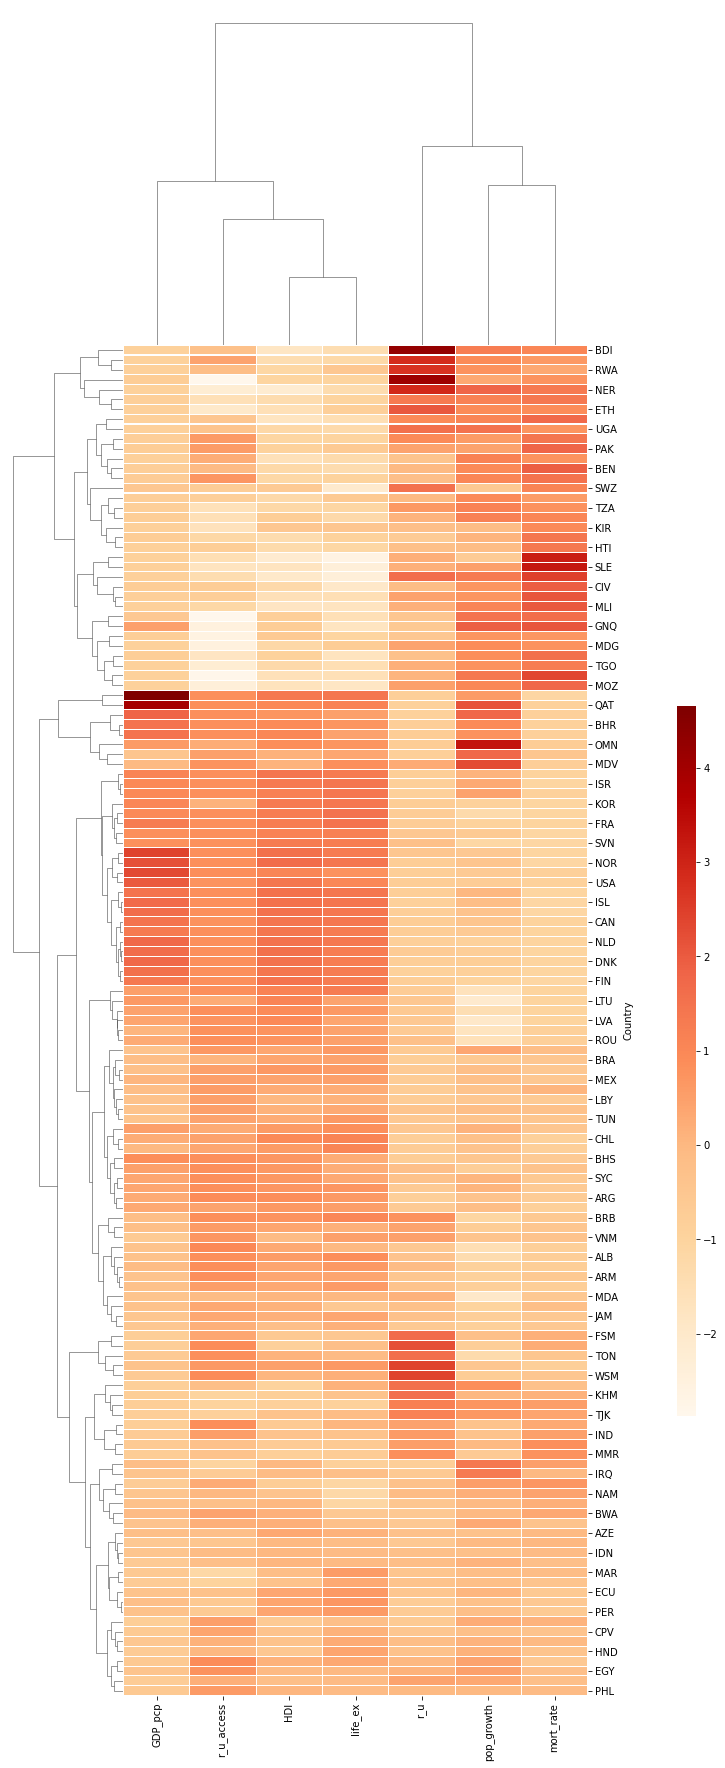

In [22]:
sns.clustermap(df_tmp,
               linewidth=0.05,
               cmap='OrRd',
               method='complete',
               figsize=(9, .18*(len(df_tmp.index))),
               cbar_pos=(1.05, .2, .03, .4))

- This clustered heatmap figure helps us identify countries with similar values across all indicators. Thus, countries are re ordered according to their similarity..